# Importing Libraries
Import necessary libraries including pandas, numpy, sklearn, matplotlib, seaborn, and graphviz.

In [12]:
# Install necessary libraries
!pip install pandas numpy scikit-learn matplotlib seaborn graphviz

In [13]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
import graphviz

# Loading the Dataset
Load the UCI Breast Cancer Wisconsin dataset, drop the ID column, and convert the Diagnosis column to binary.

In [14]:
# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/wdbc.data"
columns = ["ID", "Diagnosis"] + [f"Feature_{i}" for i in range(1, 31)]
df = pd.read_csv(url, header=None, names=columns)

# Drop the ID column
df.drop("ID", axis=1, inplace=True)

# Convert Diagnosis column to binary
df["Diagnosis"] = df["Diagnosis"].map({"M": 1, "B": 0})

# Exploratory Data Analysis (EDA)
Visualize the distribution of the target variable (Diagnosis) to ensure class balance.

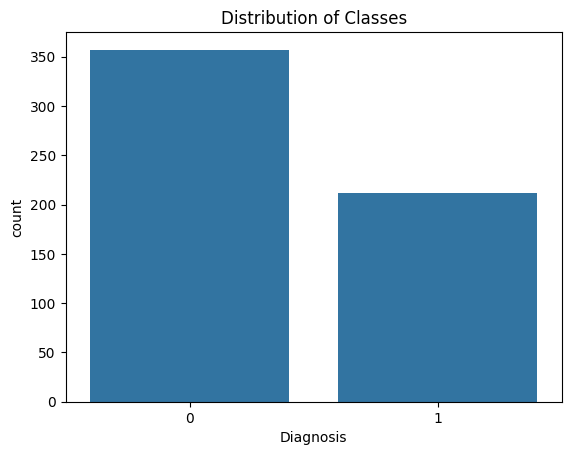

In [15]:
# Visualize class distribution
sns.countplot(x=df["Diagnosis"])
plt.title("Distribution of Classes")
plt.show()

# Splitting the Dataset
Stratify the dataset into training and testing subsets for different proportions (e.g., 80/20, 70/30).

In [16]:
# Define features and labels
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

# Split the dataset into 80/20 train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Training the Decision Tree Classifier
Train the DecisionTreeClassifier using the Gini impurity as the splitting criterion.

In [17]:
# Initialize and train the Decision Tree Classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

# Visualizing the Decision Tree
Use Graphviz to visualize the tree structure.

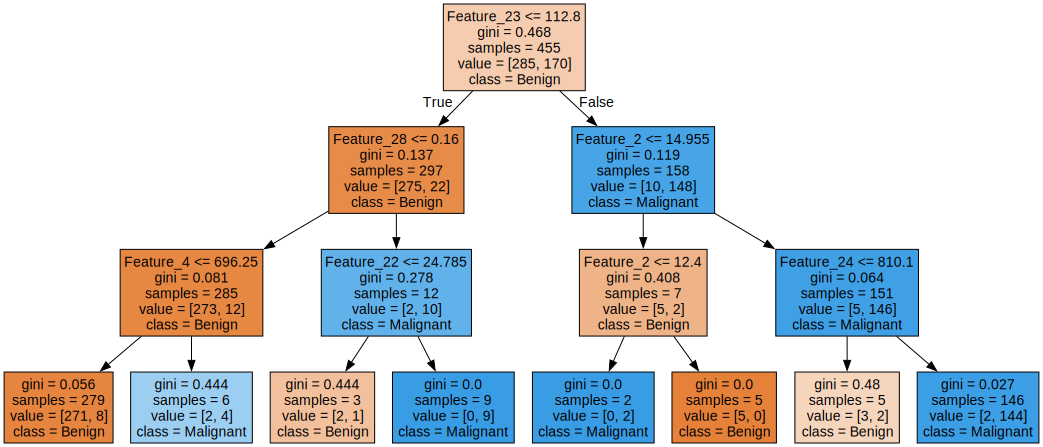

In [18]:
# Visualize the decision tree
export_graphviz(clf, out_file="tree.dot", feature_names=X.columns, class_names=["Benign", "Malignant"], filled=True)
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

# Evaluating the Model
Evaluate the trained model using metrics like accuracy, classification report, and confusion matrix.

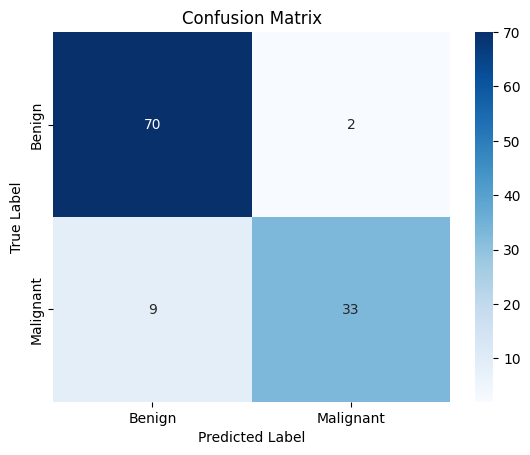

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.97      0.93        72
           1       0.94      0.79      0.86        42

    accuracy                           0.90       114
   macro avg       0.91      0.88      0.89       114
weighted avg       0.91      0.90      0.90       114

Accuracy: 0.90


In [19]:
# Predictions
y_pred = clf.predict(X_test)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Benign", "Malignant"], yticklabels=["Benign", "Malignant"])
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Analyzing the Effect of Tree Depth
Study how varying the max_depth parameter impacts accuracy.

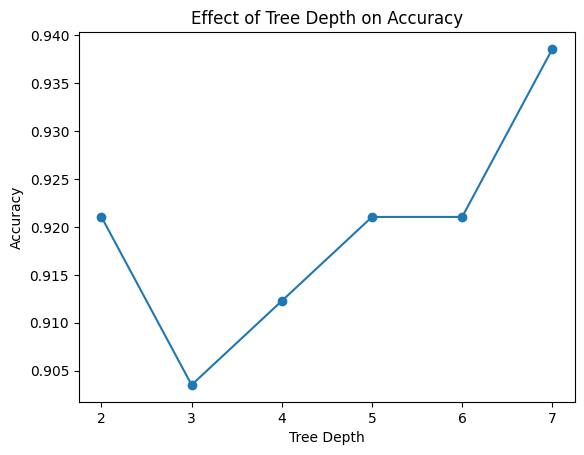

In [20]:
# Test varying tree depths
depths = [None, 2, 3, 4, 5, 6, 7]
accuracy_scores = []

for depth in depths:
    clf = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

# Plot accuracy vs. tree depth
plt.plot(depths, accuracy_scores, marker="o")
plt.title("Effect of Tree Depth on Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.show()

# Extending to Other Datasets
Repeat the above steps for the Wine Quality dataset and an additional dataset of your choice.

Wine

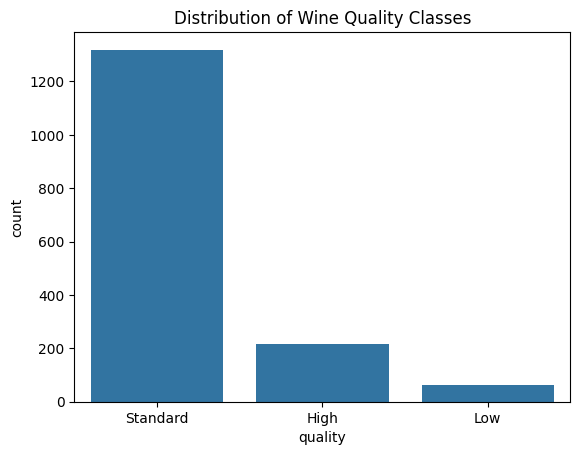

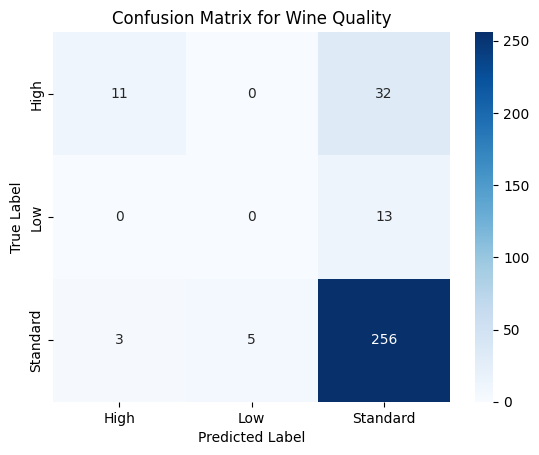

Classification Report for Wine Quality:
              precision    recall  f1-score   support

        High       0.79      0.26      0.39        43
         Low       0.00      0.00      0.00        13
    Standard       0.85      0.97      0.91       264

    accuracy                           0.83       320
   macro avg       0.55      0.41      0.43       320
weighted avg       0.81      0.83      0.80       320

Accuracy for Wine Quality: 0.83


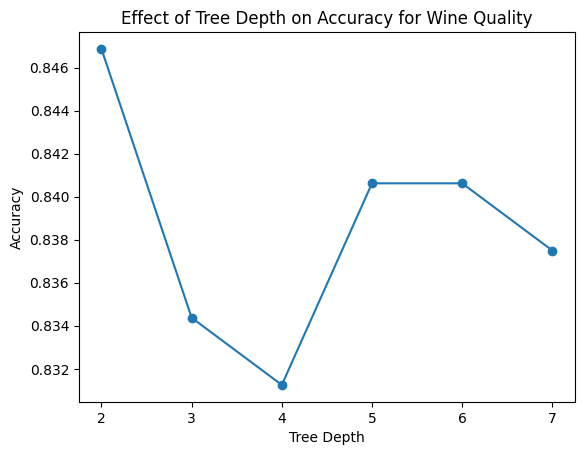

In [ ]:
# Load the Wine Quality dataset
wine_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
wine_df = pd.read_csv(wine_url, delimiter=';')

# Group wine quality into Low, Standard, and High
wine_df['quality'] = wine_df['quality'].apply(lambda x: 'Low' if x <= 4 else 'Standard' if x <= 6 else 'High')

# Visualize class distribution
sns.countplot(x=wine_df["quality"])
plt.title("Distribution of Wine Quality Classes")
plt.show()

# Define features and labels
X_wine = wine_df.drop("quality", axis=1)
y_wine = wine_df["quality"]

# Split the dataset into 80/20 train/test
X_train_wine, X_test_wine, y_train_wine, y_test_wine = train_test_split(X_wine, y_wine, test_size=0.2, stratify=y_wine, random_state=42)

# Initialize and train the Decision Tree Classifier
clf_wine = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf_wine.fit(X_train_wine, y_train_wine)

# Visualize the decision tree
export_graphviz(clf_wine, out_file="wine_tree.dot", feature_names=X_wine.columns, class_names=clf_wine.classes_, filled=True)
with open("wine_tree.dot") as f:
    dot_graph_wine = f.read()
graph_iris = graphviz.Source(dot_graph_wine)
display(graph_iris)

# Predictions
y_pred_wine = clf_wine.predict(X_test_wine)

# Confusion Matrix
cm_wine = confusion_matrix(y_test_wine, y_pred_wine)
sns.heatmap(cm_wine, annot=True, fmt="d", cmap="Blues", xticklabels=clf_wine.classes_, yticklabels=clf_wine.classes_)
plt.title("Confusion Matrix for Wine Quality")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Classification Report
print("Classification Report for Wine Quality:")
print(classification_report(y_test_wine, y_pred_wine))

# Accuracy
accuracy_wine = accuracy_score(y_test_wine, y_pred_wine)
print(f"Accuracy for Wine Quality: {accuracy_wine:.2f}")

# Test varying tree depths
depths_wine = [None, 2, 3, 4, 5, 6, 7]
accuracy_scores_wine = []

for depth in depths_wine:
    clf_wine = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf_wine.fit(X_train_wine, y_train_wine)
    y_pred_wine = clf_wine.predict(X_test_wine)
    accuracy_scores_wine.append(accuracy_score(y_test_wine, y_pred_wine))

# Plot accuracy vs. tree depth
plt.plot(depths_wine, accuracy_scores_wine, marker="o")
plt.title("Effect of Tree Depth on Accuracy for Wine Quality")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.show()


Iris dataset

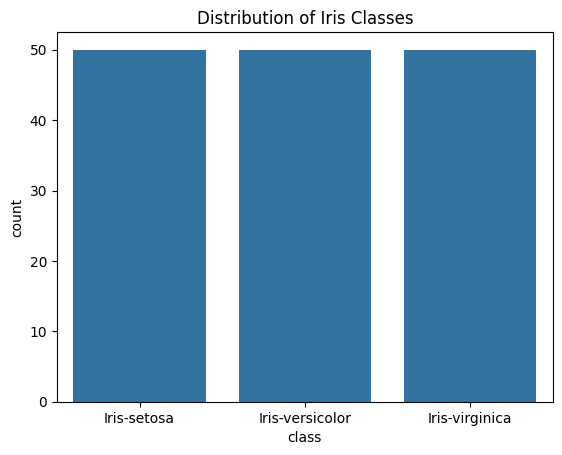

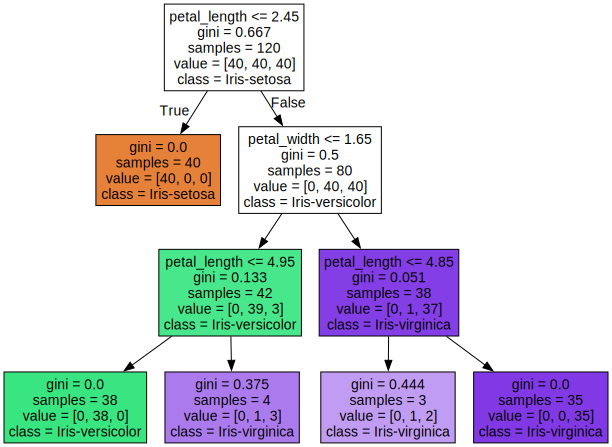

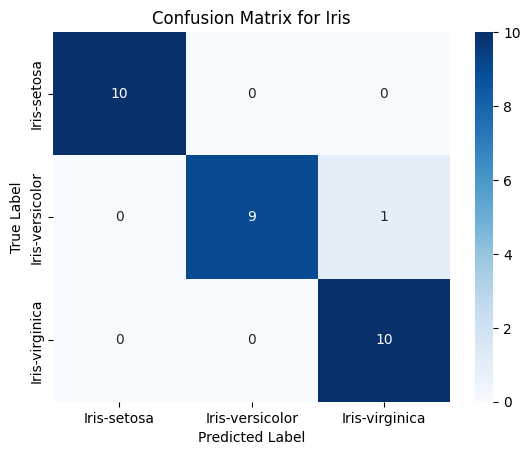

Classification Report for Iris:
                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.90      0.95        10
 Iris-virginica       0.91      1.00      0.95        10

       accuracy                           0.97        30
      macro avg       0.97      0.97      0.97        30
   weighted avg       0.97      0.97      0.97        30

Accuracy for Iris: 0.97


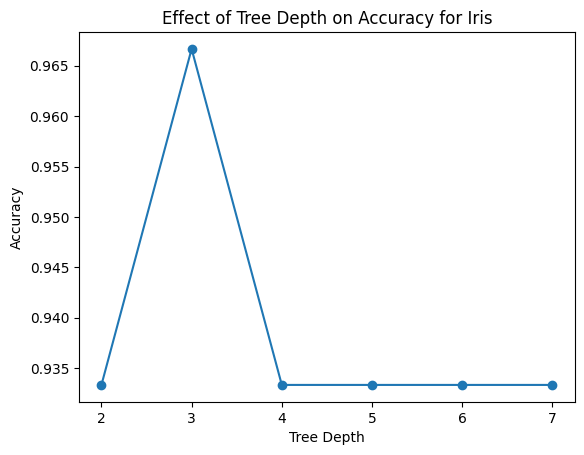

In [29]:
# Load an additional dataset of your choice
# Example: Iris dataset
iris_url = "https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data"
iris_columns = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
iris_df = pd.read_csv(iris_url, header=None, names=iris_columns)

# Visualize class distribution
sns.countplot(x=iris_df["class"])
plt.title("Distribution of Iris Classes")
plt.show()

# Define features and labels
X_iris = iris_df.drop("class", axis=1)
y_iris = iris_df["class"]

# Split the dataset into 80/20 train/test
X_train_iris, X_test_iris, y_train_iris, y_test_iris = train_test_split(X_iris, y_iris, test_size=0.2, stratify=y_iris, random_state=42)

# Initialize and train the Decision Tree Classifier
clf_iris = DecisionTreeClassifier(criterion="gini", max_depth=3, random_state=42)
clf_iris.fit(X_train_iris, y_train_iris)

# Visualize the decision tree
export_graphviz(clf_iris, out_file="iris_tree.dot", feature_names=X_iris.columns, class_names=clf_iris.classes_, filled=True)
with open("iris_tree.dot") as f:
    dot_graph_iris = f.read()
graph_iris = graphviz.Source(dot_graph_iris)
display(graph_iris)

# Predictions
y_pred_iris = clf_iris.predict(X_test_iris)

# Confusion Matrix
cm_iris = confusion_matrix(y_test_iris, y_pred_iris)
sns.heatmap(cm_iris, annot=True, fmt="d", cmap="Blues", xticklabels=clf_iris.classes_, yticklabels=clf_iris.classes_)
plt.title("Confusion Matrix for Iris")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

# Classification Report
print("Classification Report for Iris:")
print(classification_report(y_test_iris, y_pred_iris))

# Accuracy
accuracy_iris = accuracy_score(y_test_iris, y_pred_iris)
print(f"Accuracy for Iris: {accuracy_iris:.2f}")

# Test varying tree depths
depths_iris = [None, 2, 3, 4, 5, 6, 7]
accuracy_scores_iris = []

for depth in depths_iris:
    clf_iris = DecisionTreeClassifier(max_depth=depth, random_state=42)
    clf_iris.fit(X_train_iris, y_train_iris)
    y_pred_iris = clf_iris.predict(X_test_iris)
    accuracy_scores_iris.append(accuracy_score(y_test_iris, y_pred_iris))

# Plot accuracy vs. tree depth
plt.plot(depths_iris, accuracy_scores_iris, marker="o")
plt.title("Effect of Tree Depth on Accuracy for Iris")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.show()